In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
root = "/home/ubuntu/projects/grsim/ltao"

In [3]:
calib_sh48_bm = np.load(root+"/src/bin/agws_oiwfs/calib_sh48_bm.pkl",allow_pickle=True)
print(calib_sh48_bm.keys())
len(calib_sh48_bm['calib'])

dict_keys(['calib', 'pinv', 'data', 'estimate'])


7

In [4]:
calib_sh48_bm_bd = np.load(root+"/src/bin/merged_reconstructor/calib_sh48_bm.pkl",allow_pickle=True)
print(calib_sh48_bm_bd.keys())
print("{}x{}".format(len(calib_sh48_bm_bd['calib']),calib_sh48_bm_bd["calib"][0].keys()))
print(calib_sh48_bm_bd["calib"][0]['n_cols'])


dict_keys(['calib', 'pinv', 'data', 'estimate'])
1xdict_keys(['sid', 'n_mode', 'c', 'mask', 'mode', 'runtime', 'n_cols'])
189


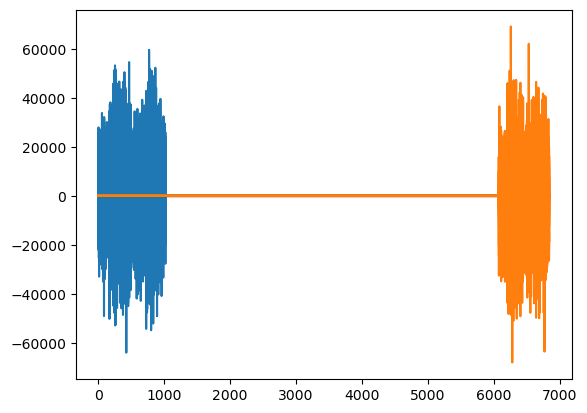

In [20]:
mat = np.array(calib_sh48_bm_bd["calib"][0]['c']).reshape(189,-1).T
plt.plot(mat[:,:27],'C0');
plt.plot(mat[:,-27:],'C1');

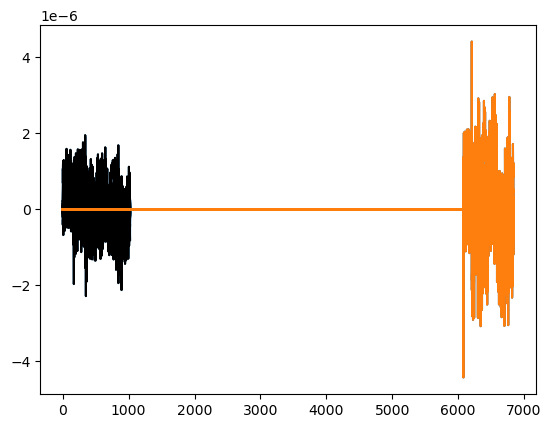

In [25]:
imat = np.linalg.pinv(mat)
plt.plot(imat[:27,:].T,'C0');
plt.plot(imat[-27:,:].T,'C0');
plt.plot(np.array(calib_sh48_bm["pinv"][0]['mat']['data']).reshape(27,-1).T,'k');
#plt.plot(imat_bd[:,:27],'C1');
plt.plot(imat_bd[:,-27:],'C1');
# plt.plot(np.array(calib_sh48_bm["pinv"][-1]['mat']['data']).reshape(27,-1).T,'k');

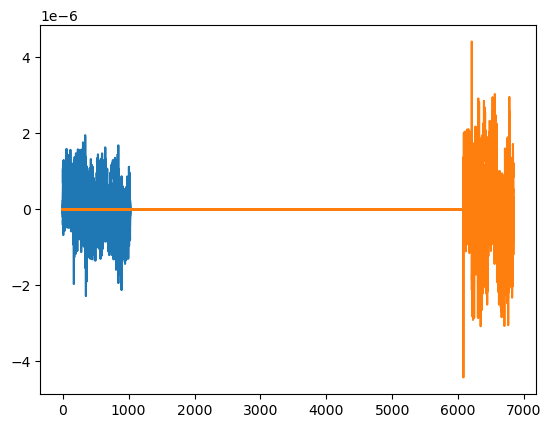

In [6]:
imat = np.linalg.pinv(mat)
plt.plot(imat[:27,:].T,'C0');
plt.plot(imat[-27:,:].T,'C1');

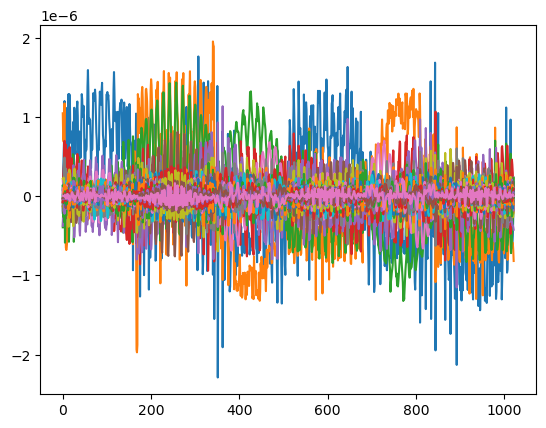

In [7]:
plt.plot(np.array(calib_sh48_bm["pinv"][0]['mat']['data']).reshape(27,-1).T);

In [10]:
sh48_recon_bm_bd = np.load(root+"/src/bin/merged_reconstructor/sh48_recon_bd.pkl",allow_pickle=True)
print(calib_sh48_bm_bd.keys())
print("{}x{}".format(len(calib_sh48_bm_bd['calib']),calib_sh48_bm_bd["calib"][0].keys()))
print(calib_sh48_bm_bd["calib"][0]['n_cols'])


dict_keys(['calib', 'pinv', 'data', 'estimate'])
1xdict_keys(['sid', 'n_mode', 'c', 'mask', 'mode', 'runtime', 'n_cols'])
189


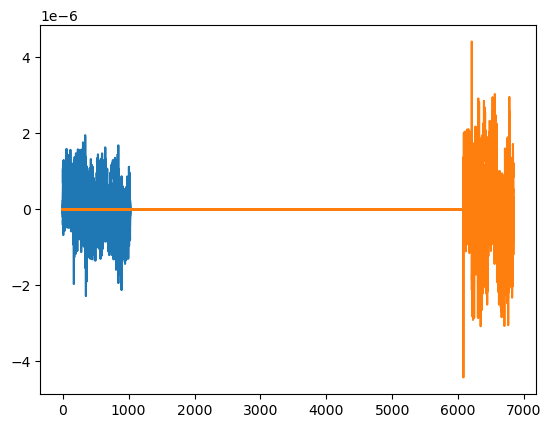

In [14]:
imat_bd = np.array(sh48_recon_bm_bd["pinv"][0]['mat']['data']).reshape(189,-1).T
plt.plot(imat_bd[:,:27],'C0');
plt.plot(imat_bd[:,-27:],'C1');

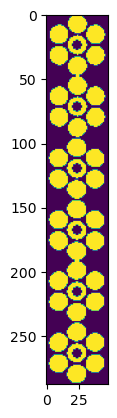

In [68]:
plt.imshow(np.array(sh48_recon_bm_bd["calib"][0]["mask"]).reshape(-1,48))

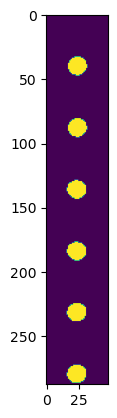

In [70]:
plt.imshow(np.array(calib_sh48_bm['calib'][0]['m1_closed_loop_to_sensor']['mask']).reshape(-1,48))

In [64]:
m = np.array(calib_sh48_bm['calib'][1]['m1_closed_loop_to_sensor']['mask'])
m.shape,m.sum()

((13824,), 1004)

In [58]:
calib_sh48_bm['calib'][0]['m1_closed_loop_to_sensor'].keys()

dict_keys(['sid', 'n_mode', 'c', 'mask', 'mode', 'runtime', 'n_cols'])

In [71]:
48*48*6

13824

In [122]:
calib_sh48_bm = np.load(root+"/src/bin/merged_reconstructor/calib_sh48_bm.pkl",allow_pickle=True)
calib_sh48_bm = np.array(calib_sh48_bm["calib"][0]['c']).reshape(189,-1).T
calib_sh48_rbm = np.load(root+"/src/bin/merged_reconstructor/calib_sh48_rbm.pkl",allow_pickle=True)
calib_sh48_rbm = np.array(calib_sh48_rbm["calib"][0]['c']).reshape(14,-1).T

In [123]:
calib_dfs_bm = np.load(root+"/src/bin/merged_reconstructor/calib_dfs_bm.pkl",allow_pickle=True)
calib_dfs_bm = np.array(calib_dfs_bm["calib"][0]['c']).reshape(27*6,-1).T
calib_dfs_rbm = np.load(root+"/src/bin/merged_reconstructor/calib_dfs_rbm.pkl",allow_pickle=True)
calib_dfs_rbm = np.array(calib_dfs_rbm["calib"][0]['c']).reshape(12,-1).T

In [132]:
(sh48_y,dfs_y) = np.load(root+"/src/bin/merged_reconstructor/sh48_dfs_y.pkl",allow_pickle=True)
sh48_y = np.array(sh48_y)
dfs_y = np.array(dfs_y)
y = np.hstack([sh48_y, dfs_y])

In [105]:
whos

Variable           Type       Data/Info
---------------------------------------
calib              ndarray    6880x203: 1396640 elems, type `float64`, 11173120 bytes (10.655517578125 Mb)
calib_dfs          ndarray    36x203: 7308 elems, type `float64`, 58464 bytes
calib_dfs_bm       ndarray    36x162: 5832 elems, type `float64`, 46656 bytes
calib_dfs_rbm      ndarray    36x12: 432 elems, type `float64`, 3456 bytes
calib_sh48         ndarray    6844x203: 1389332 elems, type `float64`, 11114656 bytes (10.599761962890625 Mb)
calib_sh48_bm      ndarray    6844x189: 1293516 elems, type `float64`, 10348128 bytes (9.868743896484375 Mb)
calib_sh48_bm_bd   dict       n=4
calib_sh48_rbm     ndarray    6844x14: 95816 elems, type `float64`, 766528 bytes (748.5625 kb)
dfs_y              ndarray    36: 36 elems, type `float64`, 288 bytes
imat               ndarray    189x6844: 1293516 elems, type `float64`, 10348128 bytes (9.868743896484375 Mb)
imat_bd            ndarray    6844x189: 1293516 elems, 

In [126]:
q = np.linalg.pinv(calib_sh48_bm) @ sh48_y
q[:10]*1e4

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
calib_sh48 = np.hstack([calib_sh48_rbm, calib_sh48_bm])

In [128]:
q = np.linalg.pinv(calib_sh48) @ sh48_y
q[14:24]*1e4

array([ 8.02611989e-19, -5.75046582e-18,  2.20522801e-18, -2.58576746e-18,
       -7.10157309e-18, -1.20860281e-18, -1.95993865e-19,  4.43677210e-19,
       -6.27739092e-19,  4.80149902e-19])

In [129]:
calib_dfs = np.hstack([calib_dfs_rbm, np.zeros((36,2)), calib_dfs_bm, np.zeros((36,27))])

In [130]:
calib = np.vstack([calib_sh48,calib_dfs])

In [133]:
q = np.linalg.pinv(calib) @ y
print(np.array_str(q[:14].reshape(7,2)*180*3600e3/np.pi,precision=3,suppress_small=True))
print(np.array_str(q[14:24]*1e4,precision=3,suppress_small=True))

[[ -2.697 -69.842]
 [  0.038  -0.175]
 [  0.     -0.   ]
 [  0.      0.   ]
 [ -0.     -0.   ]
 [ -0.04   -0.089]
 [  0.      0.   ]]
[ 0.977 -0.002 -0.001  0.002 -0.001 -0.001 -0.     0.001 -0.001 -0.001]
